In [2]:
import pandas as pd
import sqlite3
import os

base_cartoes = r'C:\Users\Vinicius\Scripts\Databases'
arquivos = {
        "tbl_identidade": "train_identity.csv",
        "tbl_transacoes": "train_transaction.csv"}

conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))
for tabela, arquivo in arquivos.items():
    caminho_csv = os.path.join(base_cartoes, arquivo)
    df = pd.read_csv(caminho_csv)
    df.to_sql(tabela, conn, if_exists='replace', index=False)
    print(f"Tabela '{tabela}' criada com sucesso!")

pd.set_option('display.max_columns', None)  # mostra todas as colunas
pd.set_option('display.expand_frame_repr', False)  # não quebra as colunas
pd.set_option('display.max_rows', None)  # mostra todas as linhas

conn.close()

Tabela 'tbl_identidade' criada com sucesso!
Tabela 'tbl_transacoes' criada com sucesso!


In [3]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_identidade = pd.read_sql("""
                            
    SELECT *
    FROM tbl_identidade

""", conn)

conn.close()

df_identidade.sample(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
136085,3538718,-5.0,308818.0,0.0,0.0,2.0,-5.0,NaN,NaN,0.0,0.0,100.0,Found,52.0,NaN,Found,Found,166.0,13.0,216.0,214.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,None,ie 11.0 for desktop,NaN,None,None,F,F,T,T,desktop,rv:11.0
59244,3125897,-25.0,234412.0,NaN,NaN,1.0,-18.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,NaN,Unknown,None,225.0,15.0,417.0,507.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,None,mobile safari 11.0,NaN,None,None,F,F,F,T,mobile,None
3789,3003334,-15.0,67249.0,0.0,0.0,-4.0,-100.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,13.0,266.0,507.0,NaN,NaN,None,NaN,NaN,NaN,None,Found,Found,None,chrome 62.0,NaN,None,None,F,F,T,T,desktop,Windows
132679,3525210,-45.0,155911.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,325.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,None,chrome 66.0,NaN,None,None,F,F,T,F,desktop,Windows
15937,3035847,-5.0,98353.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-300.0,New,NotFound,166.0,NaN,215.0,600.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,Windows 10,edge 16.0,24.0,None,match_status:2,T,F,T,T,desktop,Windows


In [4]:
print(df_identidade.shape)
percentual_nulos = (df_identidade.isnull().mean() * 100).round(2)
print(percentual_nulos)

(144233, 41)
TransactionID     0.00
id_01             0.00
id_02             2.33
id_03            54.02
id_04            54.02
id_05             5.11
id_06             5.11
id_07            96.43
id_08            96.43
id_09            48.05
id_10            48.05
id_11             2.26
id_12             0.00
id_13            11.73
id_14            44.50
id_15             2.25
id_16            10.33
id_17             3.37
id_18            68.72
id_19             3.41
id_20             3.45
id_21            96.42
id_22            96.42
id_23            96.42
id_24            96.71
id_25            96.44
id_26            96.42
id_27            96.42
id_28             2.26
id_29             2.26
id_30            46.22
id_31             2.74
id_32            46.21
id_33            49.19
id_34            46.06
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
DeviceType        2.37
DeviceInfo       17.73
dtype: float64


In [5]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_identidade = pd.read_sql("""
                        SELECT DISTINCT
                            TransactionID
                            ,DeviceType
                            ,DeviceInfo
                            ,id_01
                            ,id_12
                            ,id_02
                            ,id_05
                            ,id_06
                            ,id_15
                            ,id_17
                            ,id_19
                            ,id_20
                            ,id_28
                            ,id_29
                            ,id_31 as BrowserModel
                            ,id_35
                            ,id_36
                            ,id_37
                            ,id_38
                        FROM tbl_identidade
""",conn)

conn.close()

df_identidade.sample(5)

,TransactionID,DeviceType,DeviceInfo,id_01,id_12,id_02,id_05,id_06,id_15,id_17,id_19,id_20,id_28,id_29,BrowserModel,id_35,id_36,id_37,id_38
75314,3216054,mobile,None,-25.0,NotFound,101869.0,0.0,-11.0,Unknown,225.0,384.0,507.0,New,NotFound,mobile safari 11.0,F,F,F,F
127812,3503110,desktop,rv:59.0,-5.0,NotFound,198484.0,0.0,-1.0,New,225.0,290.0,127.0,New,NotFound,firefox,F,F,T,F
88751,3285414,desktop,ZUUM_ZEN_I Build/LRX21M,-5.0,NotFound,311761.0,0.0,-11.0,Found,225.0,384.0,507.0,Found,Found,chrome generic,F,F,T,F
46851,3096102,desktop,Windows,-5.0,NotFound,85734.0,7.0,-8.0,Found,166.0,654.0,521.0,Found,Found,edge 15.0,T,F,T,T
87014,3275987,desktop,Windows,-20.0,NotFound,100212.0,0.0,0.0,New,225.0,266.0,595.0,New,NotFound,chrome 63.0,F,F,T,F


In [6]:
percentual_nulos = (df_identidade.isnull().mean() * 100).round(2)
print(percentual_nulos)

TransactionID     0.00
DeviceType        2.37
DeviceInfo       17.73
id_01             0.00
id_12             0.00
id_02             2.33
id_05             5.11
id_06             5.11
id_15             2.25
id_17             3.37
id_19             3.41
id_20             3.45
id_28             2.26
id_29             2.26
BrowserModel      2.74
id_35             2.25
id_36             2.25
id_37             2.25
id_38             2.25
dtype: float64


In [7]:
df_identidade.fillna(df_identidade.median(numeric_only=True), inplace=True)
colunas_categoricas_idt = df_identidade.select_dtypes(include='object').columns

for col in colunas_categoricas_idt:
    df_identidade[col] = df_identidade[col].fillna('Desconhecido')
percentual_nulos = (df_identidade.isnull().mean() * 100).round(2)
print(percentual_nulos)

TransactionID    0.0
DeviceType       0.0
DeviceInfo       0.0
id_01            0.0
id_12            0.0
id_02            0.0
id_05            0.0
id_06            0.0
id_15            0.0
id_17            0.0
id_19            0.0
id_20            0.0
id_28            0.0
id_29            0.0
BrowserModel     0.0
id_35            0.0
id_36            0.0
id_37            0.0
id_38            0.0
dtype: float64


In [8]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_transacoes = pd.read_sql("""
                            
    SELECT *
    FROM tbl_transacoes

""", conn)

conn.close()

df_transacoes.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
83333,3070333,0,1789397,75.00,H,17106,555.0,167.0,mastercard,111.0,credit,177.0,87.0,NaN,NaN,hotmail.com,hotmail.com,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,254.708328,0.708333,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,75.0,75.000000,75.0,0.0,0.000000,0.0,0.0,0.0,0.0,75.0,75.000000,75.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,75.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,75.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,75.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,75.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,75.0,75.0,75.0,0.0,0.0,0.0,75.0,75.0,75.0
337638,3324638,0,8298750,72.95,W,6550,NaN,150.0,visa,226.0,debit,494.0,87.0,1.0,NaN,yahoo.com,None,12.0,8.0,0.0,0.0,3.0,7.0,0.0,0.0,8.0,0.0,5.0,0.0,32.0,9.0,127.0,127.0,21.0,126.0,21.0,NaN,NaN,NaN,NaN,51.0,126.0,NaN,NaN,NaN,126.0,T,T,T,None,None,T,F,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0

In [9]:
percentual_nulos = (df_transacoes.isnull().mean() * 100).round(2)
print(percentual_nulos)

TransactionID      0.00
isFraud            0.00
TransactionDT      0.00
TransactionAmt     0.00
ProductCD          0.00
card1              0.00
card2              1.51
card3              0.27
card4              0.27
card5              0.72
card6              0.27
addr1             11.13
addr2             11.13
dist1             59.65
dist2             93.63
P_emaildomain     15.99
R_emaildomain     76.75
C1                 0.00
C2                 0.00
C3                 0.00
C4                 0.00
C5                 0.00
C6                 0.00
C7                 0.00
C8                 0.00
C9                 0.00
C10                0.00
C11                0.00
C12                0.00
C13                0.00
C14                0.00
D1                 0.21
D2                47.55
D3                44.51
D4                28.60
D5                52.47
D6                87.61
D7                93.41
D8                87.31
D9                87.31
D10               12.87
D11             

In [10]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))
df_transacoes = pd.read_sql("""
                            
                        SELECT DISTINCT
                            TransactionID
                            ,date('2017-12-01', '+' || TransactionDT || ' seconds') AS TransactionDate
                            --,datetime('2017-12-01', '+' || TransactionDT || ' seconds') AS TransactionDateTime
                            ,cast(substring(cast(datetime('2017-12-01', '+' || TransactionDT || ' seconds') as varchar),12,2) as int) AS TransactionHour
                            ,row_number() over (partition by card1 order by TransactionID ASC) as qtd_total_transacoes
                            ,row_number() over (partition by card1, date('2017-12-01', '+' || TransactionDT || ' seconds') order by TransactionID ASC) as qtd_transacoes_dia
                            ,TransactionAmt
                            ,ProductCD
                            ,card1 as CardID
                            ,card2
                            ,card3
                            ,card4 as CardBrand
                            ,card5
                            ,card6 as TransactionType
                            ,P_emaildomain as Email
                            ,D1
                            ,isFraud
                        FROM tbl_transacoes
                        --WHERE card1 = 1001
                            """,conn)
conn.close()
df_transacoes.sample(10)

,TransactionID,TransactionDate,TransactionHour,qtd_total_transacoes,qtd_transacoes_dia,TransactionAmt,ProductCD,CardID,card2,card3,CardBrand,card5,TransactionType,Email,D1,isFraud
290660,3000943,2017-12-05,16,83,15,109.965,C,9633,130.0,185.0,visa,138.0,debit,None,0.0,0
150413,3519673,2018-05-12,13,6182,8,2128.240,W,6019,583.0,150.0,visa,226.0,credit,anonymous.com,0.0,0
465600,3131020,2018-01-04,5,2012,13,108.950,W,15066,170.0,150.0,mastercard,102.0,credit,yahoo.com,0.0,0
473051,3160440,2018-01-13,15,1,1,204.950,W,15131,441.0,150.0,visa,195.0,credit,gmail.com,0.0,0
376274,3543373,2018-05-20,2,1173,2,107.950,W,12469,360.0,150.0,mastercard,126.0,debit,gmail.com,0.0,0
140527,3394556,2018-03-30,1,24,1,59.000,W,5822,555.0,150.0,visa,226.0,debit,gmail.com,6.0,0
585542,3310359,2018-03-03,18,621,3,24.500,W,18249,360.0,150.0,mastercard,126.0,debit,aol.com,237.0,0
350123,3238976,2018-02-08,17,1824,11,39.000,W,11207,361.0,150.0,visa,226.0,debit,aol.com,21.0,0
518976,3062759,2017-12-20,2,242,3,15.688,C,16136,204.0,185.0,visa,138.0,debit,gmail.com,0.0,0
438324,3088274,2017-12-24,16,47,3,50.000,R,14025,479.0,150.0,visa,226.0,debit,anonymous.com,0.0,0


In [11]:
df_transacoes.fillna(df_transacoes.median(numeric_only=True), inplace=True)
colunas_categoricas_trx = df_transacoes.select_dtypes(include='object').columns

for col in colunas_categoricas_trx:
    df_transacoes[col] = df_transacoes[col].fillna('Desconhecido')
percentual_nulos = (df_transacoes.isnull().mean() * 100).round(2)
print(percentual_nulos)

TransactionID           0.0
TransactionDate         0.0
TransactionHour         0.0
qtd_total_transacoes    0.0
qtd_transacoes_dia      0.0
TransactionAmt          0.0
ProductCD               0.0
CardID                  0.0
card2                   0.0
card3                   0.0
CardBrand               0.0
card5                   0.0
TransactionType         0.0
Email                   0.0
D1                      0.0
isFraud                 0.0
dtype: float64


In [12]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))
df_identidade.to_sql('tb_identidade_tratada', conn, if_exists='replace', index=False)
df_transacoes.to_sql('tb_transacoes_tratadas', conn, if_exists='replace', index=False)
conn.close()

In [13]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_final = pd.read_sql(
    """
                    SELECT DISTINCT 
                            trx.TransactionID
                            ,DeviceType
                            ,DeviceInfo
                            ,id_01
                            ,id_12
                            ,id_02
                            ,id_05
                            ,id_06
                            ,id_15
                            ,id_17
                            ,id_19
                            ,id_20
                            ,id_28
                            ,id_29
                            ,BrowserModel
                            ,id_35
                            ,id_36
                            ,id_37
                            ,id_38
                            ,TransactionDate
                            ,TransactionHour
                            ,qtd_total_transacoes
                            ,qtd_transacoes_dia
                            ,TransactionAmt
                            ,ProductCD
                            ,CardID
                            ,card2
                            ,card3
                            ,CardBrand
                            ,card5
                            ,TransactionType
                            ,Email
                            ,D1
                            ,isFraud
                        FROM tb_transacoes_tratadas as trx
                        LEFT JOIN tb_identidade_tratada as idt
                            ON trx.TransactionID = idt.TransactionID
""", conn)

conn.close()

df_final.sample(5)

,TransactionID,DeviceType,DeviceInfo,id_01,id_12,id_02,id_05,id_06,id_15,id_17,id_19,id_20,id_28,id_29,BrowserModel,id_35,id_36,id_37,id_38,TransactionDate,TransactionHour,qtd_total_transacoes,qtd_transacoes_dia,TransactionAmt,ProductCD,CardID,card2,card3,CardBrand,card5,TransactionType,Email,D1,isFraud
292301,3194519,mobile,TA-1039 Build/N2G47H,-5.0,NotFound,67157.0,0.0,0.0,New,225.0,484.0,507.0,New,NotFound,chrome 63.0 for android,F,F,T,F,2018-01-25,4,1724,7,22.854,C,9633,296.0,185.0,visa,138.0,debit,gmail.com,0.0,1
518471,3545238,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,None,None,2018-05-20,22,3675,28,59.000,W,16132,111.0,150.0,visa,226.0,debit,yahoo.com,0.0,0
68545,3167761,desktop,Windows,-5.0,NotFound,401807.0,0.0,-9.0,Found,166.0,312.0,597.0,Found,Found,chrome 63.0,T,F,T,F,2018-01-15,23,3,1,175.000,R,3046,555.0,150.0,visa,226.0,credit,yahoo.com,0.0,1
525873,3560296,mobile,SM-G935F Build/NRD90M,-5.0,NotFound,243407.0,-2.0,-23.0,Found,225.0,567.0,315.0,Found,Found,chrome 66.0 for android,F,F,T,F,2018-05-26,3,44,1,58.099,C,16355,130.0,185.0,visa,226.0,credit,hotmail.com,0.0,1
1655,3082292,desktop,Desconhecido,0.0,NotFound,63427.0,0.0,0.0,New,225.0,427.0,563.0,New,NotFound,chrome 63.0,F,F,T,T,2017-12-23,17,54,1,17.723,C,1085,500.0,185.0,mastercard,219.0,credit,gmail.com,72.0,0


In [14]:
percentual_nulos = (df_final.isnull().mean() * 100).round(2)
print(percentual_nulos)

TransactionID            0.00
DeviceType              75.58
DeviceInfo              75.58
id_01                   75.58
id_12                   75.58
id_02                   75.58
id_05                   75.58
id_06                   75.58
id_15                   75.58
id_17                   75.58
id_19                   75.58
id_20                   75.58
id_28                   75.58
id_29                   75.58
BrowserModel            75.58
id_35                   75.58
id_36                   75.58
id_37                   75.58
id_38                   75.58
TransactionDate          0.00
TransactionHour          0.00
qtd_total_transacoes     0.00
qtd_transacoes_dia       0.00
TransactionAmt           0.00
ProductCD                0.00
CardID                   0.00
card2                    0.00
card3                    0.00
CardBrand                0.00
card5                    0.00
TransactionType          0.00
Email                    0.00
D1                       0.00
isFraud   

In [15]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_teste = pd.read_sql(
    """
    SELECT *
    FROM tb_transacoes_tratadas
    WHERE TransactionID = 3532103
""", conn
)

df_teste2 = pd.read_sql(
    """
    SELECT *
    FROM tb_identidade_tratada
    WHERE TransactionID = 3532103
""", conn
)
conn.close()

print(df_teste)
print("")
print(df_teste2)

   TransactionID TransactionDate  TransactionHour  qtd_total_transacoes  qtd_transacoes_dia  TransactionAmt ProductCD  CardID  card2  card3 CardBrand  card5 TransactionType      Email   D1  isFraud
0        3532103      2018-05-16               14                  6245                  20           77.95         W   12544  321.0  150.0      visa  226.0           debit  yahoo.com  0.0        0

Empty DataFrame
Columns: [TransactionID, DeviceType, DeviceInfo, id_01, id_12, id_02, id_05, id_06, id_15, id_17, id_19, id_20, id_28, id_29, BrowserModel, id_35, id_36, id_37, id_38]
Index: []


In [16]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_teste_fraude = pd.read_sql(
    """
                    SELECT DISTINCT 
                            isFraud
                            ,count(trx.TransactionID) as qtd
                        FROM tb_transacoes_tratadas as trx
                        LEFT JOIN tb_identidade_tratada as idt
                            ON trx.TransactionID = idt.TransactionID
                        WHERE idt.TransactionID IS NULL
                        GROUP BY 1
""", conn)

conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_teste_fraude2 = pd.read_sql(
    """
                    SELECT DISTINCT 
                            isFraud
                            ,count(trx.TransactionID) as qtd
                        FROM tb_transacoes_tratadas as trx
                        INNER JOIN tb_identidade_tratada as idt
                            ON trx.TransactionID = idt.TransactionID
                        GROUP BY 1
""", conn)


conn.close()
print('Fraudes sem relação na tabela de identidade')
print(df_teste_fraude)
print("")
print('Fraudes com relação')
print(df_teste_fraude2)

Fraudes sem relação na tabela de identidade
   isFraud     qtd
0        0  436962
1        1    9345

Fraudes com relação
   isFraud     qtd
0        0  132915
1        1   11318


In [17]:
print((9345 / (9345 + 11318)) *100)

45.22576586168513


In [18]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))

df_com_identidade = pd.read_sql(
    """
                    SELECT DISTINCT 
                            trx.TransactionID
                            ,DeviceType
                            ,DeviceInfo
                            ,id_01
                            ,id_12
                            ,id_02
                            ,id_05
                            ,id_06
                            ,id_15
                            ,id_17
                            ,id_19
                            ,id_20
                            ,id_28
                            ,id_29
                            ,BrowserModel
                            ,id_35
                            ,id_36
                            ,id_37
                            ,id_38
                            ,TransactionDate
                            ,TransactionHour
                            ,qtd_total_transacoes
                            ,qtd_transacoes_dia
                            ,TransactionAmt
                            ,ProductCD
                            ,CardID
                            ,card2
                            ,card3
                            ,CardBrand
                            ,card5
                            ,TransactionType
                            ,Email
                            ,D1
                            ,isFraud
                        FROM tb_transacoes_tratadas as trx
                        INNER JOIN tb_identidade_tratada as idt
                            ON trx.TransactionID = idt.TransactionID
""", conn)

df_sem_identidade = pd.read_sql(
    """
                    SELECT DISTINCT 
                            trx.TransactionID
                            ,TransactionDate
                            ,TransactionHour
                            ,qtd_total_transacoes
                            ,qtd_transacoes_dia
                            ,TransactionAmt
                            ,ProductCD
                            ,CardID
                            ,card2
                            ,card3
                            ,CardBrand
                            ,card5
                            ,TransactionType
                            ,Email
                            ,D1
                            ,isFraud
                        FROM tb_transacoes_tratadas as trx
                        LEFT JOIN tb_identidade_tratada as idt
                            ON trx.TransactionID = idt.TransactionID
                        WHERE idt.TransactionID IS NULL
""", conn)

df_com_identidade.to_sql('transacoes_identificacao', conn, if_exists='replace', index=False)
df_sem_identidade.to_sql('transacoes_puras', conn, if_exists='replace', index=False)

conn.close()

print(df_com_identidade.sample(5))
print(df_sem_identidade.sample(5))

       TransactionID    DeviceType    DeviceInfo  id_01     id_12     id_02  id_05  id_06         id_15  id_17  id_19  id_20         id_28         id_29        BrowserModel         id_35         id_36         id_37         id_38 TransactionDate  TransactionHour  qtd_total_transacoes  qtd_transacoes_dia  TransactionAmt ProductCD  CardID  card2  card3 CardBrand  card5 TransactionType         Email    D1  isFraud
95532        3491641  Desconhecido  Desconhecido  -15.0  NotFound  125800.5    0.0    0.0  Desconhecido  166.0  341.0  472.0  Desconhecido  Desconhecido        Desconhecido  Desconhecido  Desconhecido  Desconhecido  Desconhecido      2018-05-02               21                   488                   4          25.000         S   12866  303.0  150.0      visa  226.0           debit  Desconhecido   0.0        1
98518        3166940       desktop  Desconhecido  -10.0  NotFound   94954.0    0.0    0.0         Found  100.0  225.0  314.0         Found         Found         chrome 63.0

In [19]:
percentual_nulos = (df_com_identidade.isnull().mean() * 100).round(2)
print('Tabela com Dados da Identidade do Cliente')
print(percentual_nulos)

print("")
print('------------------------------------')
print("")

print('Tabela SEM Dados da Identidade do Cliente')
percentual_nulos = (df_sem_identidade.isnull().mean() * 100).round(2)
print(percentual_nulos)

Tabela com Dados da Identidade do Cliente
TransactionID           0.0
DeviceType              0.0
DeviceInfo              0.0
id_01                   0.0
id_12                   0.0
id_02                   0.0
id_05                   0.0
id_06                   0.0
id_15                   0.0
id_17                   0.0
id_19                   0.0
id_20                   0.0
id_28                   0.0
id_29                   0.0
BrowserModel            0.0
id_35                   0.0
id_36                   0.0
id_37                   0.0
id_38                   0.0
TransactionDate         0.0
TransactionHour         0.0
qtd_total_transacoes    0.0
qtd_transacoes_dia      0.0
TransactionAmt          0.0
ProductCD               0.0
CardID                  0.0
card2                   0.0
card3                   0.0
CardBrand               0.0
card5                   0.0
TransactionType         0.0
Email                   0.0
D1                      0.0
isFraud                 0.0
dtype:

In [20]:
conn = sqlite3.connect(os.path.join(base_cartoes,'credit_card.db'))
df_duplicados = pd.read_sql(
    """
    SELECT 
        TransactionID
        ,count(TransactionID) as qtd
    FROM transacoes_identificacao
    GROUP BY 1
    ORDER BY qtd DESC
""", conn
)

df_completo = pd.read_sql(
    """
    SELECT *
    FROM transacoes_identificacao
""", conn
)
conn.close()

print(df_duplicados.head(5))
df_completo.sample(5)

   TransactionID  qtd
0        3577534    1
1        3577531    1
2        3577529    1
3        3577526    1
4        3577521    1


,TransactionID,DeviceType,DeviceInfo,id_01,id_12,id_02,id_05,id_06,id_15,id_17,id_19,id_20,id_28,id_29,BrowserModel,id_35,id_36,id_37,id_38,TransactionDate,TransactionHour,qtd_total_transacoes,qtd_transacoes_dia,TransactionAmt,ProductCD,CardID,card2,card3,CardBrand,card5,TransactionType,Email,D1,isFraud
55394,3088267,mobile,SM-G955U Build/NRD90M,0.0,Found,77326.0,0.0,0.0,Found,166.0,390.0,549.0,Found,Found,chrome 63.0 for android,T,F,T,T,2017-12-24,16,444,12,50.000,H,7826,481.0,150.0,mastercard,224.0,debit,yahoo.com,0.0,0
126043,3200210,desktop,Desconhecido,-5.0,NotFound,88526.0,0.0,0.0,Found,225.0,270.0,417.0,Found,Found,firefox 57.0,F,F,T,F,2018-01-27,7,377,3,108.438,C,16062,500.0,185.0,mastercard,137.0,credit,gmail.com,0.0,1
29473,3527574,mobile,SM-J700M Build/MMB29K,-20.0,NotFound,298256.0,0.0,0.0,New,225.0,427.0,507.0,New,NotFound,chrome 66.0 for android,F,F,T,F,2018-05-14,22,2469,16,23.608,C,4461,375.0,185.0,mastercard,224.0,debit,gmail.com,0.0,0
36087,3024816,desktop,MacOS,0.0,NotFound,39271.0,0.0,0.0,Found,166.0,100.0,391.0,Found,Found,chrome 62.0,T,F,T,T,2017-12-11,20,21,1,75.000,H,5714,170.0,150.0,visa,195.0,credit,sbcglobal.net,0.0,0
10392,3004483,desktop,rv:57.0,0.0,NotFound,103259.0,0.0,0.0,New,166.0,307.0,404.0,New,NotFound,firefox 57.0,T,F,T,T,2017-12-06,13,130,13,100.000,H,2616,327.0,150.0,discover,102.0,credit,gmail.com,0.0,0


In [21]:
valores_unicos = df_completo.nunique()
print(valores_unicos)

TransactionID           144233
DeviceType                   3
DeviceInfo                1787
id_01                       77
id_12                        2
id_02                   115656
id_05                       93
id_06                      101
id_15                        4
id_17                      104
id_19                      522
id_20                      394
id_28                        3
id_29                        3
BrowserModel               131
id_35                        3
id_36                        3
id_37                        3
id_38                        3
TransactionDate            182
TransactionHour             24
qtd_total_transacoes     10319
qtd_transacoes_dia         648
TransactionAmt            7830
ProductCD                    4
CardID                    8499
card2                      482
card3                      103
CardBrand                    5
card5                      106
TransactionType              4
Email                       60
D1      

In [22]:
df_completo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         144233 non-null  int64  
 1   DeviceType            144233 non-null  object 
 2   DeviceInfo            144233 non-null  object 
 3   id_01                 144233 non-null  float64
 4   id_12                 144233 non-null  object 
 5   id_02                 144233 non-null  float64
 6   id_05                 144233 non-null  float64
 7   id_06                 144233 non-null  float64
 8   id_15                 144233 non-null  object 
 9   id_17                 144233 non-null  float64
 10  id_19                 144233 non-null  float64
 11  id_20                 144233 non-null  float64
 12  id_28                 144233 non-null  object 
 13  id_29                 144233 non-null  object 
 14  BrowserModel          144233 non-null  object 
 15  

In [23]:
df_completo.fillna(df_completo.median(numeric_only=True), inplace=True)
colunas_categoricas_idt = df_completo.select_dtypes(include='object').columns

for col in colunas_categoricas_idt:
    df_completo[col] = df_completo[col].fillna('Desconhecido')

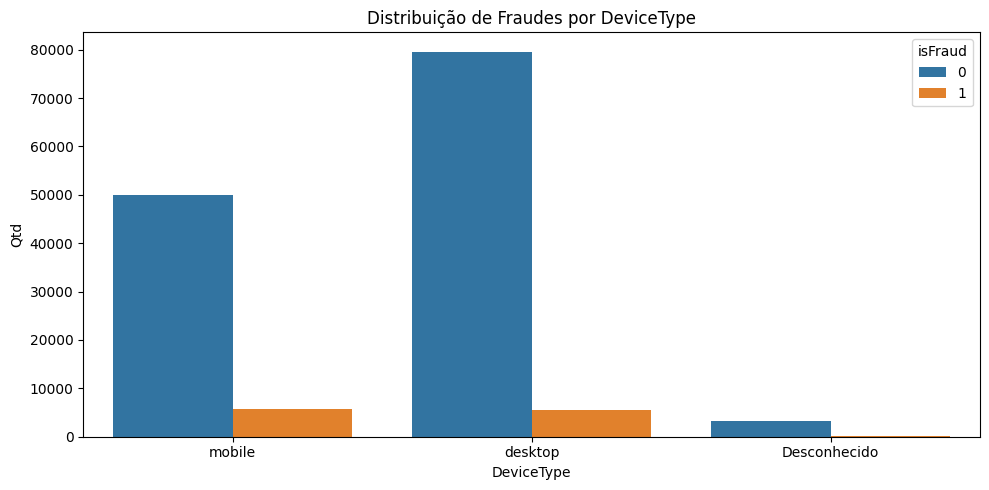

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='DeviceType',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por DeviceType')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

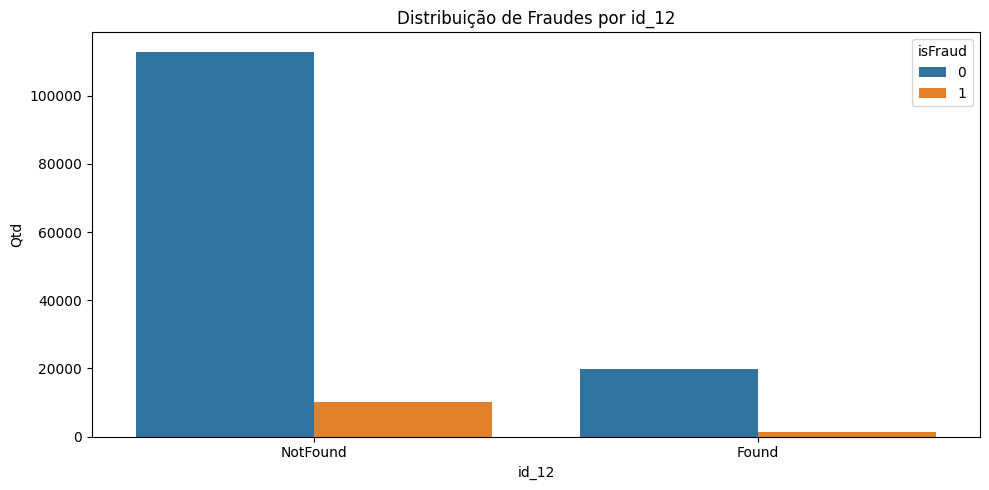

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_12',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_12')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

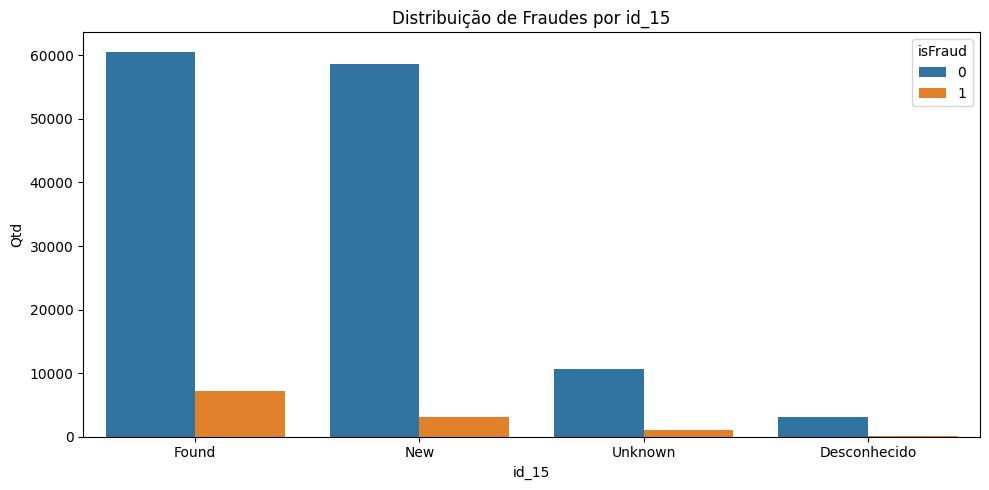

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_15',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_15')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

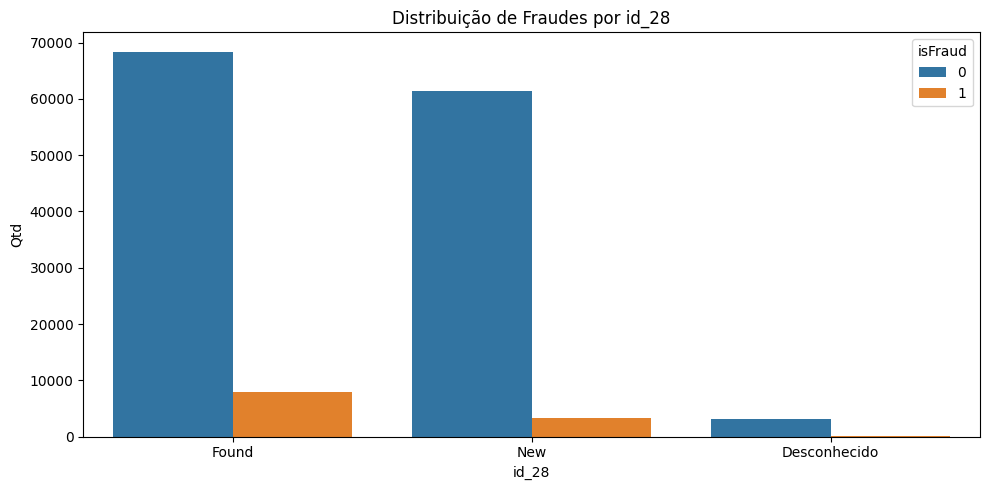

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_28',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_28')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

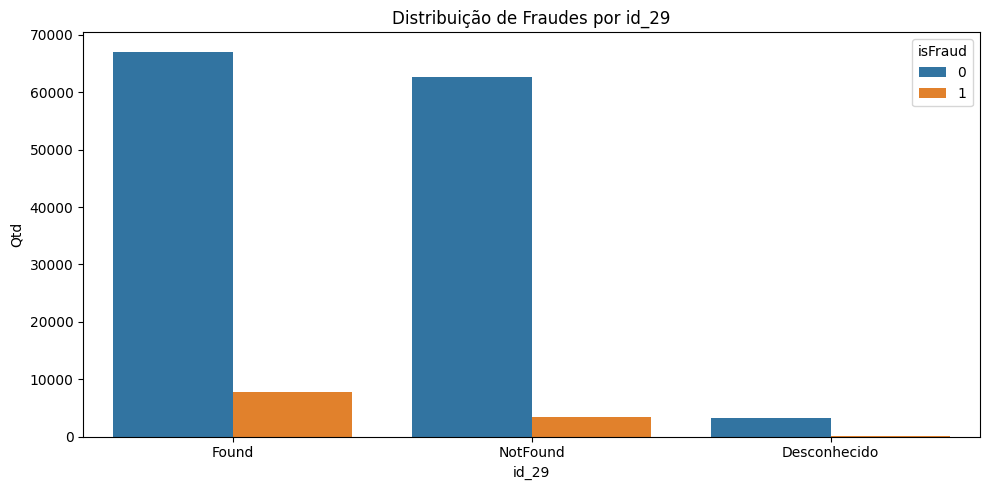

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_29',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_29')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

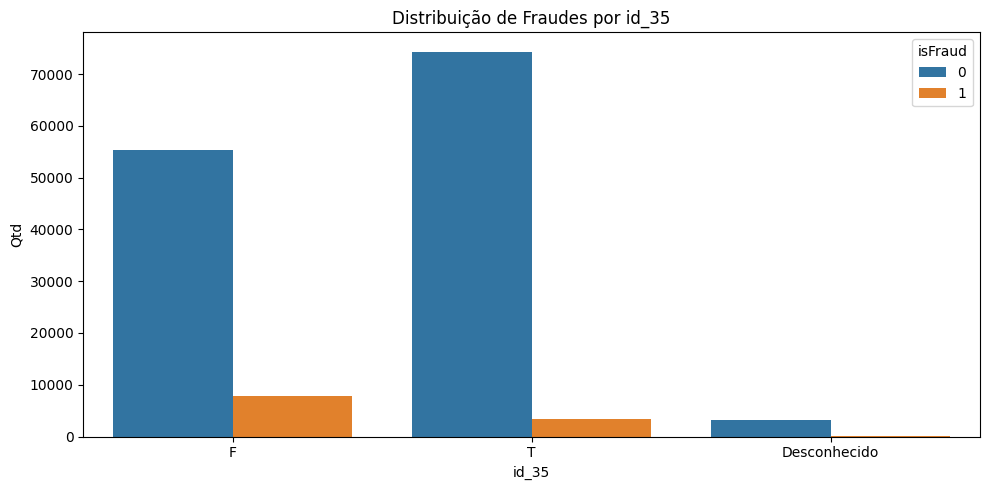

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_35',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_35')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

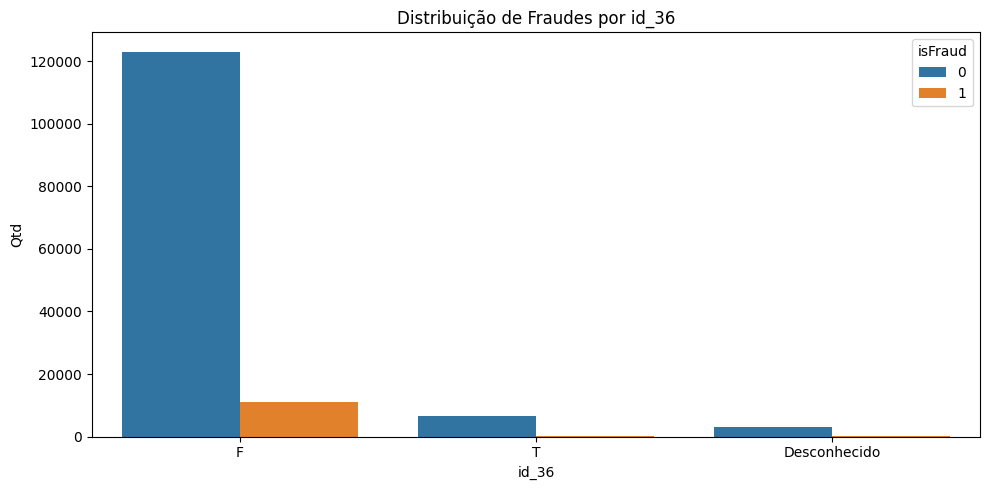

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_36',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_36')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

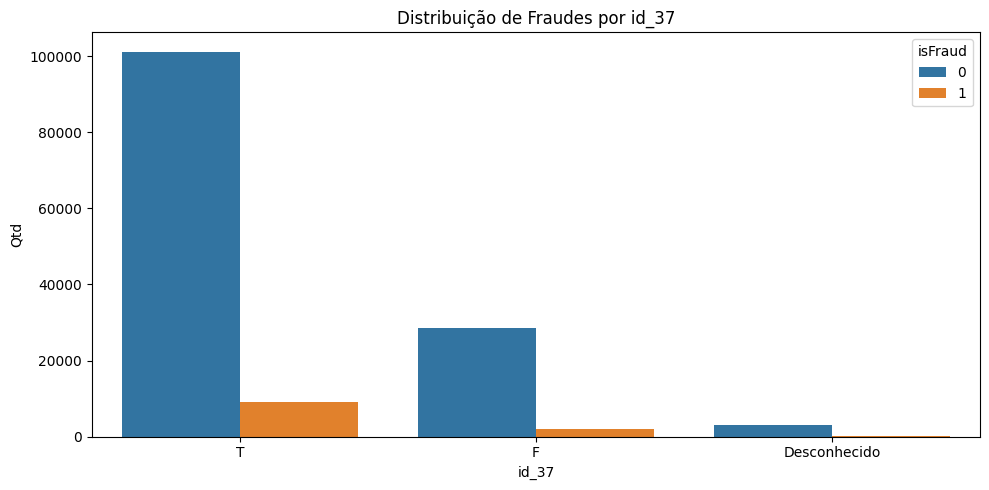

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_37',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_37')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

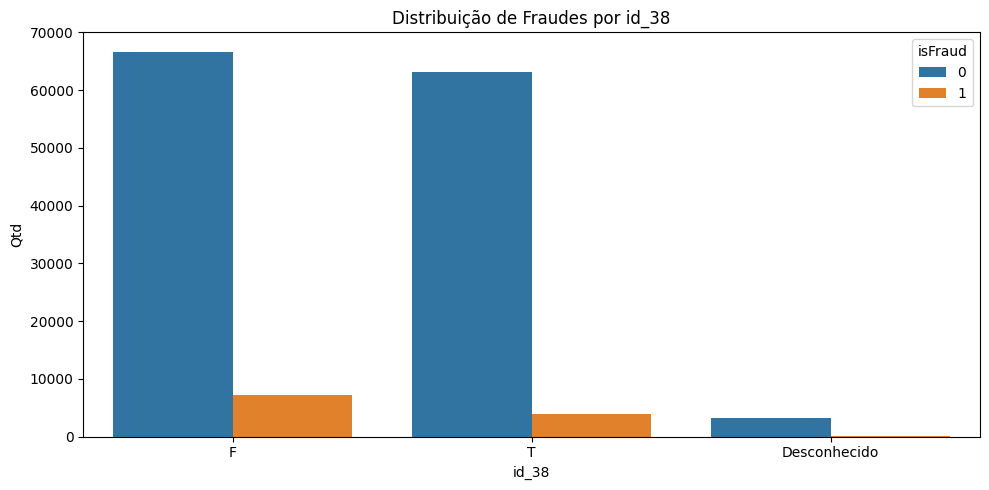

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='id_38',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por id_38')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

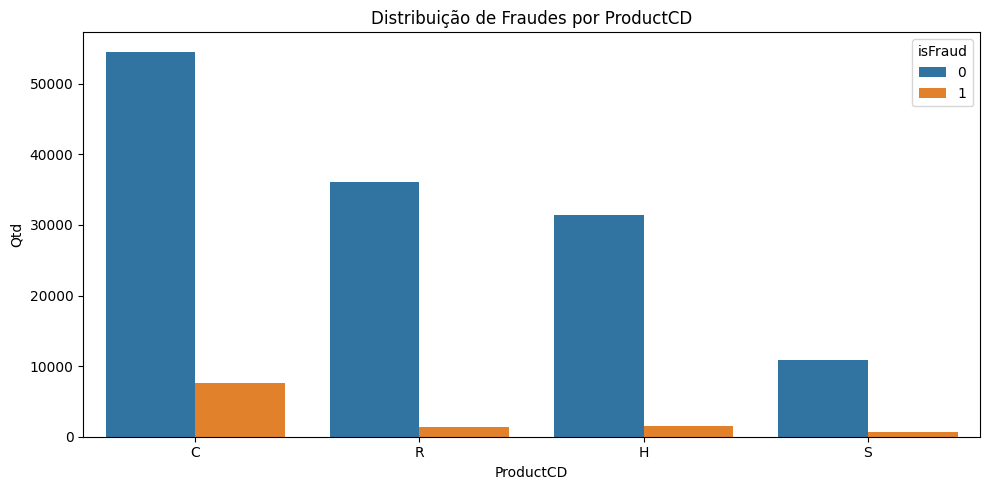

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='ProductCD',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por ProductCD')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

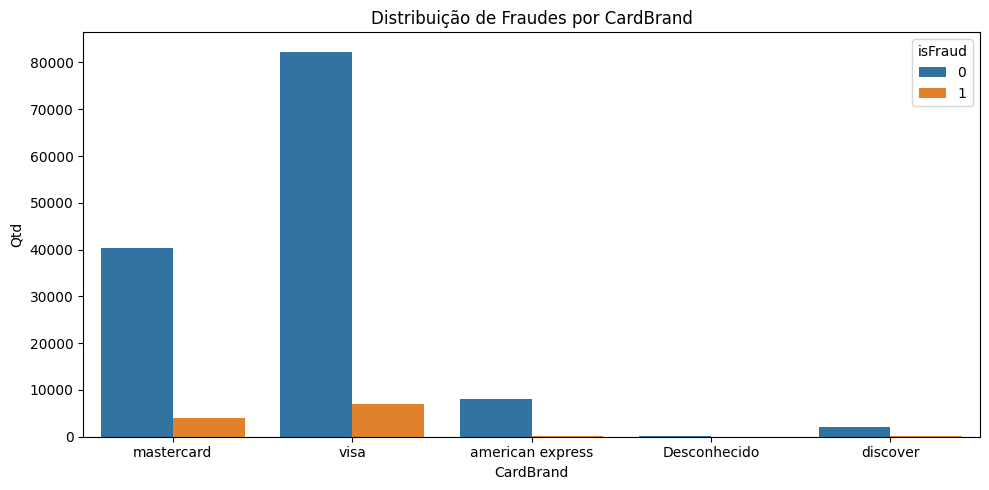

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='CardBrand',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por CardBrand')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

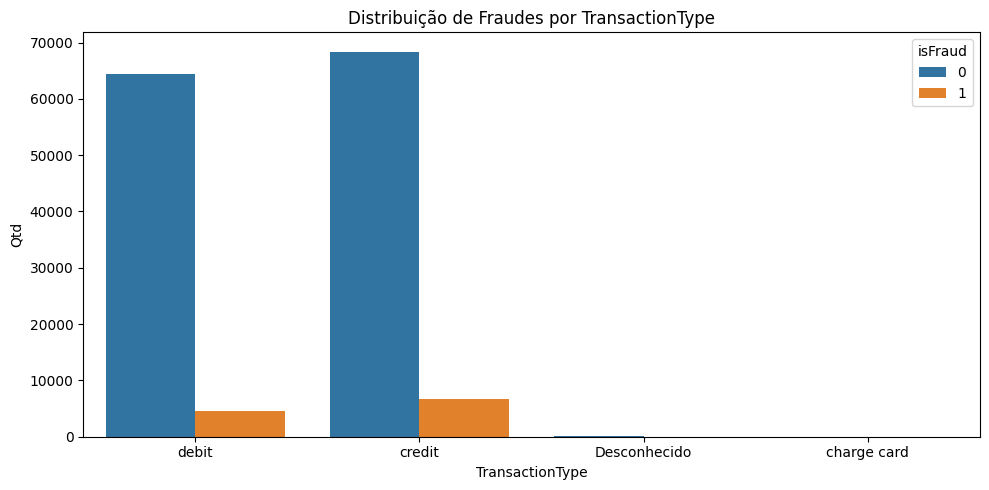

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_completo,
    x='TransactionType',
    hue='isFraud',
)
plt.title('Distribuição de Fraudes por TransactionType')
plt.ylabel('Qtd')
plt.tight_layout()
plt.show()

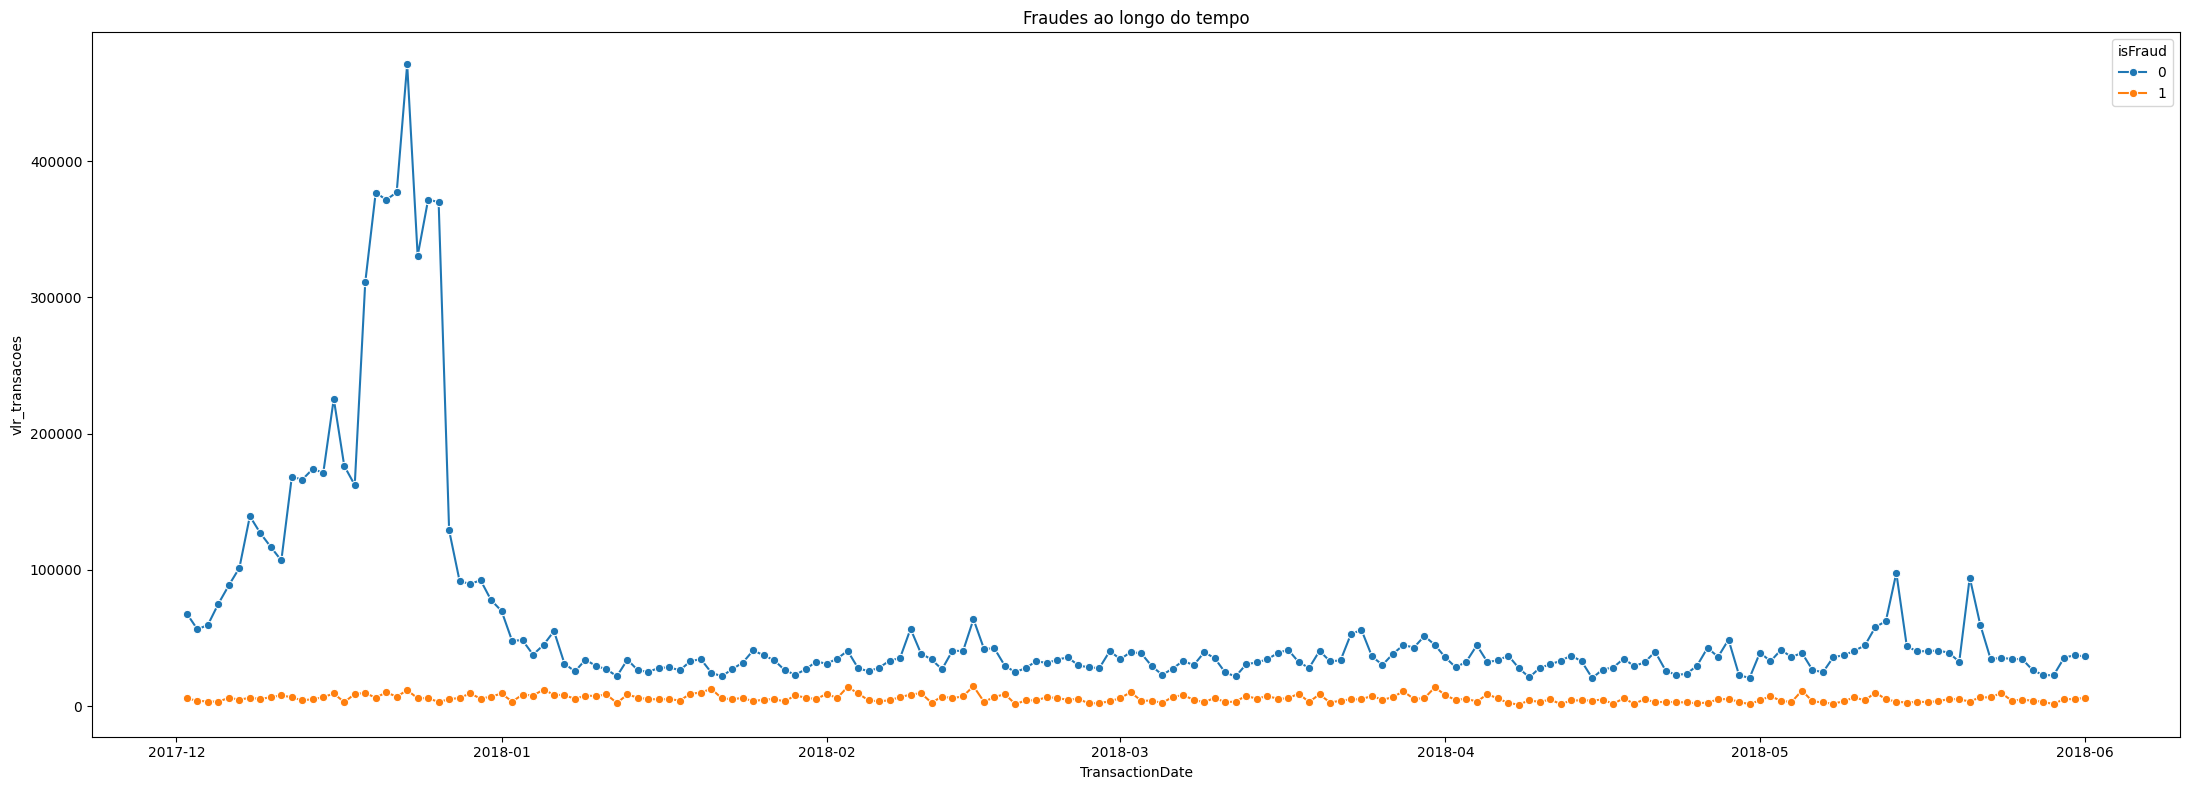

In [36]:
df_completo['TransactionDate'] = pd.to_datetime(df_completo['TransactionDate'])

df_plot = (
    df_completo
    .groupby(['TransactionDate', 'isFraud'])
    .agg(vlr_transacoes=('TransactionAmt', 'sum'))
    .reset_index()
)

# Plot
plt.figure(figsize=(22,8))
sns.lineplot(
    data=df_plot,
    x='TransactionDate',
    y='vlr_transacoes',
    hue='isFraud',
    marker='o'
)
plt.title('Fraudes ao longo do tempo')
plt.tight_layout()
plt.show()

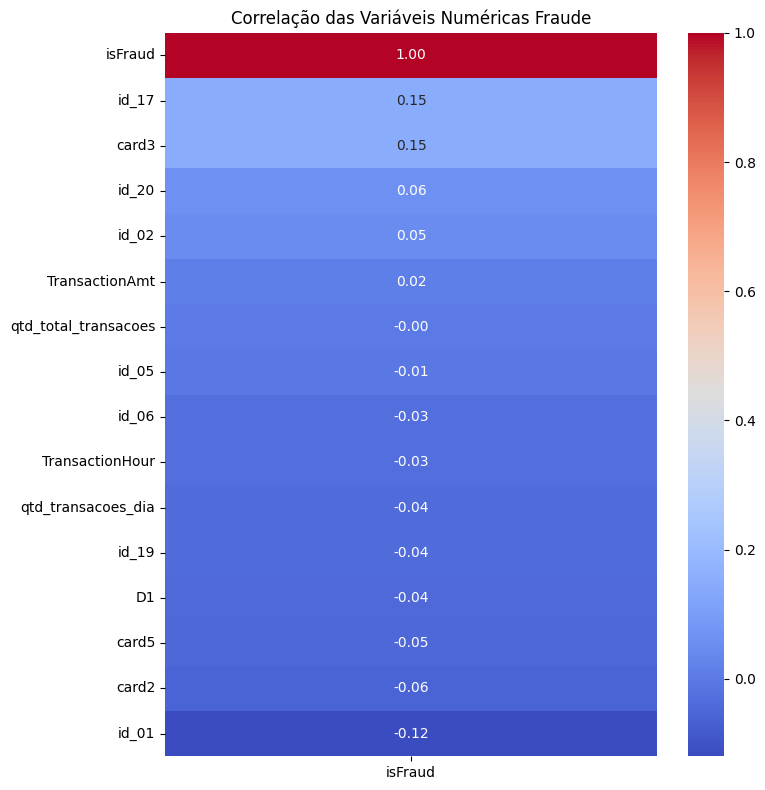

In [37]:
variaveis_numericas = [
    'id_01', 'id_02', 'id_05', 'id_06',
    'id_17', 'id_19', 'id_20',
    'TransactionAmt', 'card2', 'card3', 'card5', 'D1', 'TransactionHour','qtd_total_transacoes','qtd_transacoes_dia','isFraud'
]

df_correlacoes = df_completo[variaveis_numericas].copy()
correlacoes = df_correlacoes.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(8, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das Variáveis Numéricas Fraude')
plt.tight_layout()
plt.show()

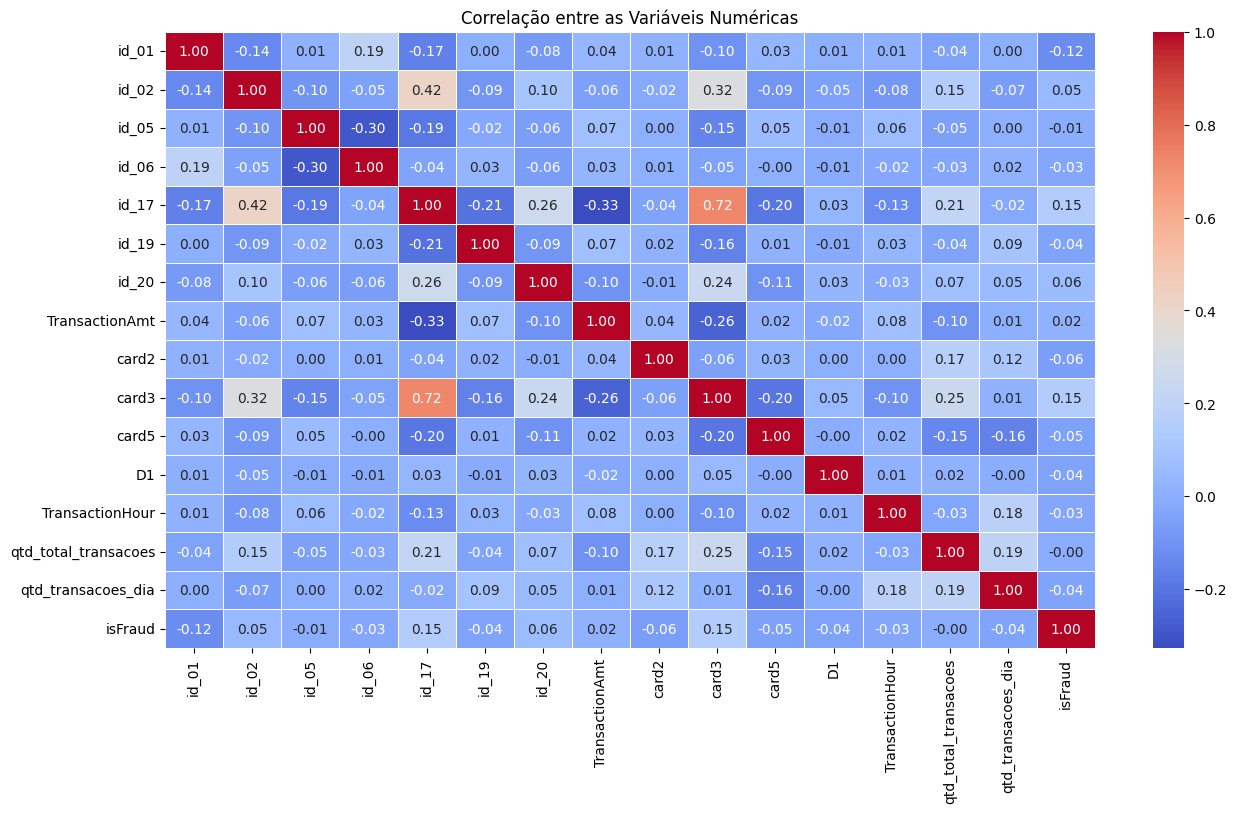

In [38]:
variaveis_numericas = [
    'id_01', 'id_02', 'id_05', 'id_06',
    'id_17', 'id_19', 'id_20',
    'TransactionAmt', 'card2', 'card3', 'card5', 'D1', 'TransactionHour','qtd_total_transacoes','qtd_transacoes_dia','isFraud'
]

df_correlacoes = df_completo[variaveis_numericas].copy()
corr = df_correlacoes.corr()

# 3. Criar o mapa de calor
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # fmt para formatar as anotações
plt.title('Correlação entre as Variáveis Numéricas')
plt.show()

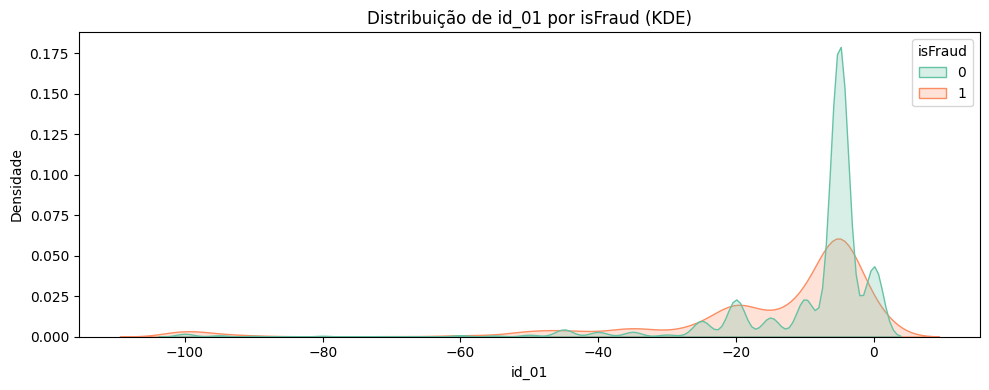

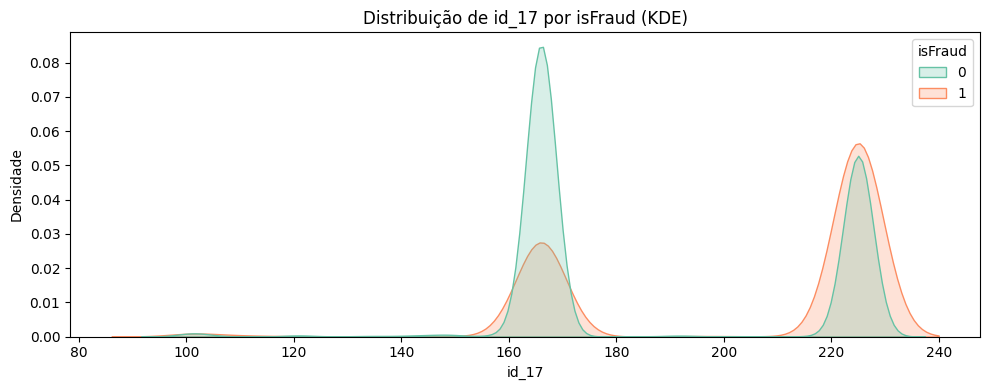

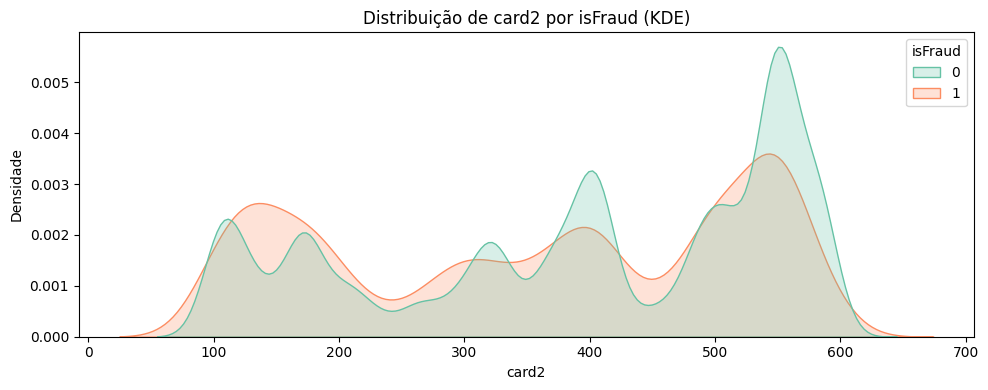

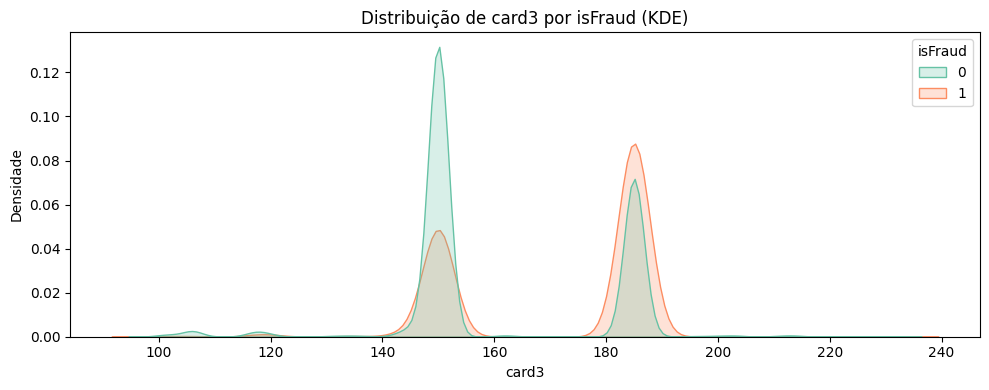

In [39]:
variaveis_expressivas = [
    'id_01', 'id_17', 'card2', 'card3'
]

# KDE para cada variável numérica
for var in variaveis_expressivas:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(
        data=df_completo,
        x=var,
        hue='isFraud',
        common_norm=False,
        fill=True,
        palette='Set2'
    )
    plt.title(f'Distribuição de {var} por isFraud (KDE)')
    plt.xlabel(var)
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, r2_score, accuracy_score, roc_auc_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

df_completo.columns

colunas_modelo = [
        'DeviceType', 'DeviceInfo', 'id_01', 'id_12', 'id_02',
       'id_05', 'id_06', 'id_15', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
       'BrowserModel', 'id_35', 'id_36', 'id_37', 'id_38', 
       'TransactionAmt', 'ProductCD', 'card2', 'card3', 'CardBrand',
       'card5', 'TransactionType', 'Email', 'D1', 'TransactionHour','qtd_total_transacoes','qtd_transacoes_dia', 'isFraud'
]

df_modelo = pd.DataFrame(df_completo,columns=colunas_modelo)
df_modelo.sample(5)

,DeviceType,DeviceInfo,id_01,id_12,id_02,id_05,id_06,id_15,id_17,id_19,id_20,id_28,id_29,BrowserModel,id_35,id_36,id_37,id_38,TransactionAmt,ProductCD,card2,card3,CardBrand,card5,TransactionType,Email,D1,TransactionHour,qtd_total_transacoes,qtd_transacoes_dia,isFraud
32627,desktop,Windows,-5.0,Found,22908.0,4.0,-1.0,Found,166.0,548.0,280.0,Found,Found,chrome generic,T,F,T,F,500.000,R,478.0,150.0,visa,195.0,credit,anonymous.com,1.0,15,13,3,0
82532,mobile,SM-G920V Build/NRD90M,0.0,NotFound,40501.0,1.0,-17.0,New,166.0,352.0,161.0,New,NotFound,chrome 65.0 for android,T,F,T,T,50.000,H,264.0,150.0,visa,226.0,credit,yahoo.com,0.0,17,53,1,0
21251,desktop,MacOS,0.0,NotFound,4136.0,1.0,0.0,Found,166.0,529.0,256.0,Found,Found,safari generic,T,F,T,T,45.000,S,119.0,150.0,visa,195.0,credit,Desconhecido,2.0,1,147,1,1
120360,mobile,HUAWEI VNS-L53 Build/HUAWEIVNS-L53,-45.0,NotFound,203534.0,2.0,-9.0,Found,225.0,384.0,507.0,Found,Found,chrome 64.0 for android,F,F,T,F,27.793,C,545.0,185.0,visa,138.0,debit,hotmail.com,0.0,1,5367,10,0
1527,desktop,Windows,-10.0,NotFound,229395.0,0.0,0.0,New,225.0,266.0,127.0,New,NotFound,chrome generic,F,F,T,F,29.757,C,555.0,146.0,visa,226.0,credit,anonymous.com,0.0,14,1,1,0


In [41]:
df_modelo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DeviceType            144233 non-null  object 
 1   DeviceInfo            144233 non-null  object 
 2   id_01                 144233 non-null  float64
 3   id_12                 144233 non-null  object 
 4   id_02                 144233 non-null  float64
 5   id_05                 144233 non-null  float64
 6   id_06                 144233 non-null  float64
 7   id_15                 144233 non-null  object 
 8   id_17                 144233 non-null  float64
 9   id_19                 144233 non-null  float64
 10  id_20                 144233 non-null  float64
 11  id_28                 144233 non-null  object 
 12  id_29                 144233 non-null  object 
 13  BrowserModel          144233 non-null  object 
 14  id_35                 144233 non-null  object 
 15  

In [42]:
variaveis_categoricas = []
for i in df_modelo.columns[0:30].tolist():
    if df_modelo.dtypes[i] == 'object':
        variaveis_categoricas.append(i)

print(variaveis_categoricas)
print('---------------------------------------------------------------------------------------------------------------------')

lb = LabelEncoder()

for var in variaveis_categoricas:
    df_modelo[var] = lb.fit_transform(df_modelo[var])
df_modelo.head(5)

['DeviceType', 'DeviceInfo', 'id_12', 'id_15', 'id_28', 'id_29', 'BrowserModel', 'id_35', 'id_36', 'id_37', 'id_38', 'ProductCD', 'CardBrand', 'TransactionType', 'Email']
---------------------------------------------------------------------------------------------------------------------


,DeviceType,DeviceInfo,id_01,id_12,id_02,id_05,id_06,id_15,id_17,id_19,id_20,id_28,id_29,BrowserModel,id_35,id_36,id_37,id_38,TransactionAmt,ProductCD,card2,card3,CardBrand,card5,TransactionType,Email,D1,TransactionHour,qtd_total_transacoes,qtd_transacoes_dia,isFraud
0,2,283,-5.0,1,135399.0,0.0,0.0,1,225.0,266.0,305.0,1,1,49,1,1,2,1,23.443,0,555.0,185.0,3,224.0,3,17,0.0,23,1,1,0
1,1,724,-5.0,1,188177.0,1.0,0.0,1,166.0,341.0,222.0,1,1,48,2,1,2,1,150.000,2,583.0,150.0,4,226.0,2,17,0.0,18,1,1,0
2,1,1553,0.0,1,83689.0,1.0,0.0,1,166.0,529.0,549.0,1,1,92,2,2,2,2,30.000,1,583.0,150.0,4,226.0,2,2,0.0,19,2,1,0
3,2,1728,0.0,1,184466.0,1.0,0.0,1,166.0,404.0,439.0,1,1,102,2,1,2,2,50.000,1,583.0,150.0,4,226.0,2,3,0.0,16,3,1,0
4,1,1553,0.0,1,118967.0,0.0,0.0,2,166.0,548.0,277.0,2,2,92,2,2,2,2,50.000,1,543.0,150.0,3,117.0,3,4,0.0,0,1,1,0


In [43]:
preditoras = df_modelo.iloc[:,0:30]
alvo = df_modelo.iloc[:,30]
print('Variaveis que vão prever')
print(preditoras.head(5))
print('Variavel alvo de fraude')
print(alvo.head(5))

Variaveis que vão prever
   DeviceType  DeviceInfo  id_01  id_12     id_02  id_05  id_06  id_15  id_17  id_19  id_20  id_28  id_29  BrowserModel  id_35  id_36  id_37  id_38  TransactionAmt  ProductCD  card2  card3  CardBrand  card5  TransactionType  Email   D1  TransactionHour  qtd_total_transacoes  qtd_transacoes_dia
0           2         283   -5.0      1  135399.0    0.0    0.0      1  225.0  266.0  305.0      1      1            49      1      1      2      1          23.443          0  555.0  185.0          3  224.0                3     17  0.0               23                     1                   1
1           1         724   -5.0      1  188177.0    1.0    0.0      1  166.0  341.0  222.0      1      1            48      2      1      2      1         150.000          2  583.0  150.0          4  226.0                2     17  0.0               18                     1                   1
2           1        1553    0.0      1   83689.0    1.0    0.0      1  166.0  529.0  549.

In [44]:
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras,alvo, test_size= 0.2, random_state=42)
x_treino.head(5)

,DeviceType,DeviceInfo,id_01,id_12,id_02,id_05,id_06,id_15,id_17,id_19,id_20,id_28,id_29,BrowserModel,id_35,id_36,id_37,id_38,TransactionAmt,ProductCD,card2,card3,CardBrand,card5,TransactionType,Email,D1,TransactionHour,qtd_total_transacoes,qtd_transacoes_dia
1570,1,1599,-5.0,1,82898.0,0.0,0.0,2,166.0,529.0,549.0,2,2,54,2,1,2,2,30.000,1,555.0,150.0,4,226.0,3,17,0.0,17,27,1
44672,2,1728,-5.0,1,90765.0,0.0,0.0,2,166.0,542.0,533.0,2,2,99,2,1,1,1,100.000,2,327.0,150.0,2,226.0,2,10,0.0,14,181,5
120678,2,563,-5.0,1,117649.0,0.0,0.0,1,225.0,266.0,315.0,1,1,52,1,1,2,1,26.947,0,545.0,185.0,4,138.0,3,20,28.0,1,5730,10
124951,2,456,-5.0,1,401008.0,0.0,0.0,1,225.0,266.0,127.0,1,1,32,1,1,2,1,83.490,0,545.0,185.0,4,138.0,3,20,6.0,19,10264,33
53384,2,1553,-5.0,1,1655.0,19.0,-9.0,2,166.0,197.0,368.0,2,2,9,2,2,1,2,20.000,3,553.0,150.0,4,226.0,2,0,0.0,18,3365,18


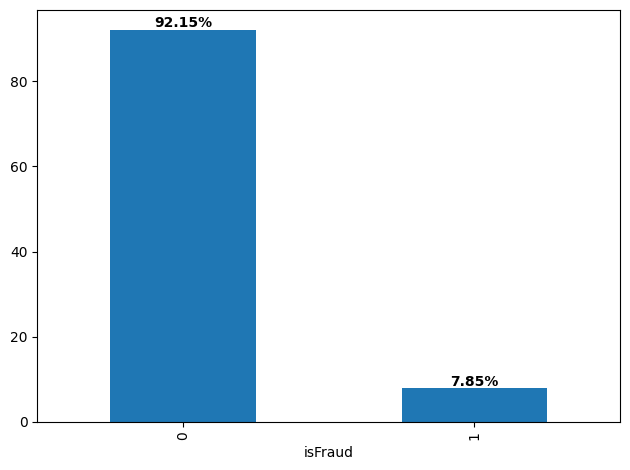

In [45]:
percentuais = alvo.value_counts(normalize=True) * 100
ax = percentuais.plot(kind='bar')
                      
for i, v in enumerate(percentuais):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

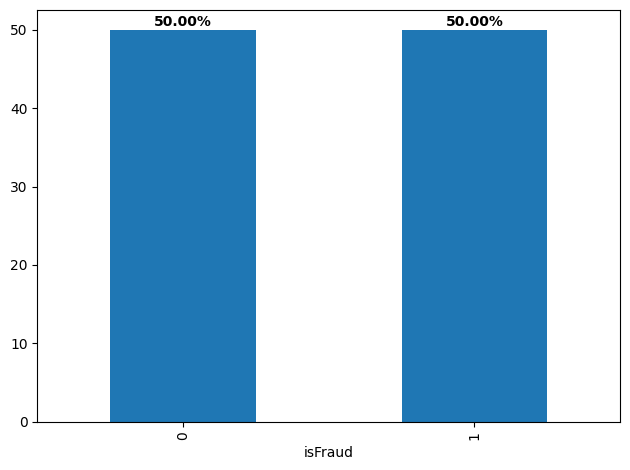

In [46]:
balanceador = SMOTE(random_state=42)

preditoras_balanceado, alvo_balanceado = balanceador.fit_resample(preditoras,alvo)


percentuais = alvo_balanceado.value_counts(normalize=True) * 100
ax = percentuais.plot(kind='bar')
                      
for i, v in enumerate(percentuais):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [47]:
Normalizador = MinMaxScaler()

x_treino_normalizado = Normalizador.fit_transform(x_treino)
x_teste_normalizado = Normalizador.transform(x_teste)

#Padronizador = StandardScaler()

#x_treino_padronizado = Padronizador.fit_transform(x_treino)
#x_teste_padronizado = Padronizador.fit_transform(x_teste)

x_treino_normalizado # Vai virar array e não mais um head/tabela

array([[0.5       , 0.89529675, 0.95      , ..., 0.73913043, 0.00174193,
        0.        ],
       [1.        , 0.9675252 , 0.95      , ..., 0.60869565, 0.01205949,
        0.00619195],
       [1.        , 0.31522956, 0.95      , ..., 0.04347826, 0.38382688,
        0.01393189],
       ...,
       [0.5       , 0.13157895, 0.95      , ..., 0.17391304, 0.03932735,
        0.        ],
       [0.5       , 0.89529675, 0.95      , ..., 0.56521739, 0.03684845,
        0.        ],
       [1.        , 0.39193729, 0.95      , ..., 0.26086957, 0.47655098,
        0.04489164]], shape=(115386, 30))

Melhores parâmetros: {'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 1000}
Melhor AUC (cv): 0.9590991513749687
Acurácia: 96.89%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     26565
           1       0.80      0.81      0.81      2282

    accuracy                           0.97     28847
   macro avg       0.89      0.90      0.89     28847
weighted avg       0.97      0.97      0.97     28847



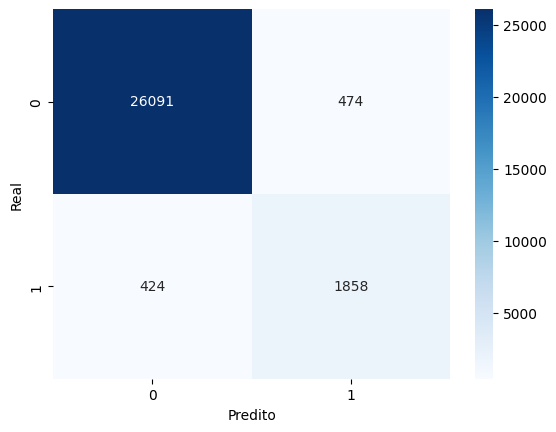

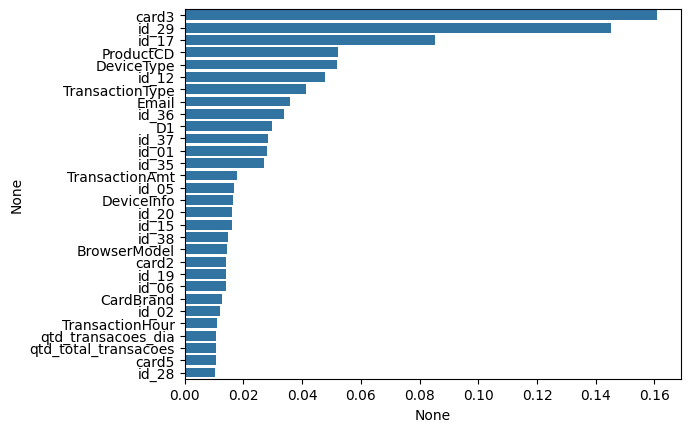

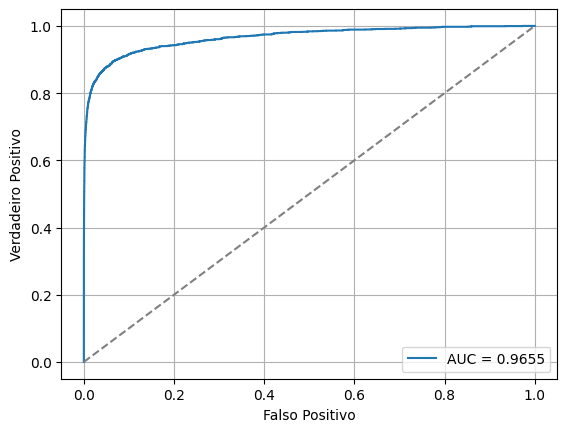

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve)

#Incluir grid search aqui com cross validation usando os paramentros abaixo

modelo_xgb = XGBClassifier(scale_pos_weight=10, eval_metric='logloss', random_state=42)

parametros_grid = {
    'n_estimators': [1000,1500],
    'learning_rate': [0.2,0.15],
    'max_depth': [10,12]
}

grid_search = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=parametros_grid,
    scoring='roc_auc',
    cv=5)

grid_search.fit(x_treino_normalizado, y_treino)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor AUC (cv):", grid_search.best_score_)

melhor_modelo = grid_search.best_estimator_

y_probabilistico = melhor_modelo.predict_proba(x_teste_normalizado)[:, 1]

threshold = 0.2
y_proba_threshold = (y_probabilistico >= threshold).astype(int)


print(f"Acurácia: {accuracy_score(y_teste, y_proba_threshold):.2%}")
print(classification_report(y_teste, y_proba_threshold))

matriz_confusao = confusion_matrix(y_teste,y_proba_threshold, labels=[0,1])
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

importancia_variaveis = pd.Series(data=melhor_modelo.feature_importances_,index=preditoras_balanceado.columns)
importancia_variaveis = importancia_variaveis.sort_values(ascending=False)
sns.barplot(x=importancia_variaveis, y=importancia_variaveis.index, orient='h')
plt.show()

fpr, tpr, _ = roc_curve(y_teste, y_probabilistico)
curva_roc_auc = roc_auc_score(y_teste, y_probabilistico)

plt.plot(fpr, tpr, label=f"AUC = {curva_roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.legend()
plt.grid()
plt.show()